In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kwant
from fractions import Fraction

### 2D 2 leads

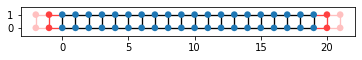

In [2]:
a=1
L=20
W=2
t=3

syst =kwant.Builder()
lat= kwant.lattice.square(a)

for i in range(L):
    for j in range(W):
        syst[lat(i,j)]=4*t
        if j>0:
            syst[lat(i,j),lat(i,j-1)]=-t
        if i>0:
            syst[lat(i,j),lat(i-1,j)]=-t
            

            
sym_left_lead=kwant.TranslationalSymmetry((-a,0))
left_lead=kwant.Builder(sym_left_lead)

for j in range(W):
    left_lead[lat(0, j)] = 4 * t
    if j > 0:
        left_lead[lat(0, j), lat(0, j - 1)] = -t
    left_lead[lat(1, j), lat(0, j)] = -t
    
syst.attach_lead(left_lead)

sym_right_lead = kwant.TranslationalSymmetry((a, 0))
right_lead = kwant.Builder(sym_right_lead)
for j in range(W):
    right_lead[lat(0, j)] = 4 * t
    if j > 0:
        right_lead[lat(0, j), lat(0, j - 1)] = -t
    right_lead[lat(1, j), lat(0, j)] = -t
syst.attach_lead(right_lead)

kwant.plot(syst)

syst = syst.finalized()

Text(0, 0.5, 'conductance [e^2/h]')

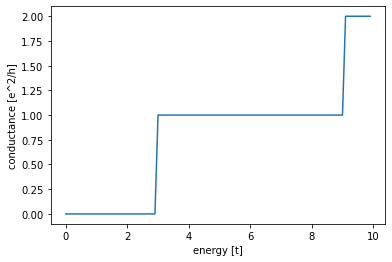

In [3]:
energies = []
data = []
for ie in range(100):
    energy = ie * 0.1
# compute the scattering matrix at a given energy
    smatrix = kwant.smatrix(syst, energy)
# compute the transmission probability from lead 0 to
# lead 1
    energies.append(energy)
    data.append(smatrix.transmission(1, 0))
    
plt.figure()
plt.plot(energies, data)
plt.xlabel("energy [t]")
plt.ylabel("conductance [e^2/h]")


### Closed 1D system

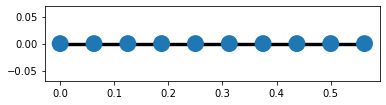

/home/mag55061/miniconda3/envs/convenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


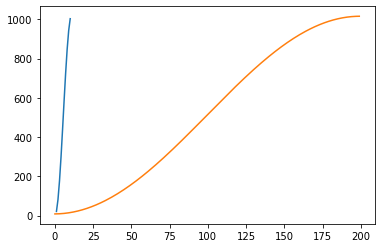

In [158]:
syst=kwant.Builder()
a=1/16
L=10
t=1/a**2 #hopping

lat=kwant.lattice.chain(a=a,norbs=1)
for i in range(L):
    syst[lat(i)]=2*t
    if i>0:
        syst[lat(i),lat(i-1)]=-t
    #if i<L-1:
    #    syst[lat(i),lat(i+1)]=-t

kwant.plot(syst)
syst=syst.finalized()
###Plot Energies
plt.plot(np.arange(1,L+1),np.sort(np.real(np.linalg.eigvals(syst.hamiltonian_submatrix()))))
eigs=np.sort(np.real(np.linalg.eigvals(syst.hamiltonian_submatrix())))
ploy=np.polyfit(np.arange(L)[:L//4],eigs[:L//4],2)
#plt.plot(np.arange(L),np.poly1d(ploy)(np.arange(L)),'r')
#plt.plot(np.arange(1,L+1),np.pi**2/((L+1)*a)**2*np.arange(1,L+1)**2,'--y')
#plt.plot(np.arange(1,L+1),np.pi**2/((L-1)*a)**2*np.arange(1,L+1)**2,'--y')


r=np.linspace(0,L//4)
dens=kwant.kpm.SpectralDensity(syst)
energies,density=dens()
plt.plot(energies)

#plt.ylim(0,10)
#plt.xlim(0,100)

/home/mag55061/miniconda3/envs/convenv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


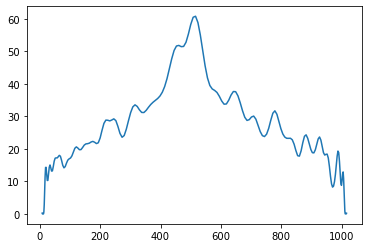

In [159]:
plt.plot(energies,densities)

In [154]:
energies

nan

### 1D system with 2 leads

In [50]:
syst=kwant.Builder()
a=1
L=10
t=1 #hopping

lat=kwant.lattice.chain(a=a,norbs=1)

def onsite(site):
    x = site.pos
    return 2*t

for i in range(L):
    syst[lat(i)]=2*t
    #syst[lat(i)]=onsite
    if i>0:
        syst[lat(i),lat(i-1)]=-t


In [51]:
sym_left_lead=kwant.TranslationalSymmetry([-a])
left_lead=kwant.Builder(sym_left_lead)

In [52]:
left_lead[lat(0)]=2*t
left_lead[lat(1),lat(0)]=-t

In [53]:
syst.attach_lead(left_lead)

[]

In [54]:
syst=syst.finalized()

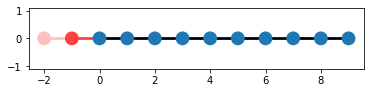

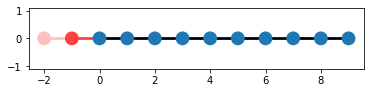

In [55]:
kwant.plot(syst)

In [56]:
energies = []
data = []
for ie in range(100):
    energy = ie * 0.1
# compute the scattering matrix at a given energy
    smatrix = kwant.smatrix(syst, energy)
# compute the transmission probability from lead 0 to
# lead 1
    energies.append(energy)
    #data.append(smatrix.transmission(1, 0))
    
plt.figure()
plt.plot(energies, data)
plt.xlabel("energy [t]")
plt.ylabel("conductance [e^2/h]")


ValueError: Input a needs to be a square matrix.

### 2 Fermions 1D

In [95]:
a=Fraction(1,5)
L=20
N=int(Fraction(L,a))
a=float(a)
t=1/a**2

V=0.1*t
lat=kwant.lattice.square(a)
syst=kwant.Builder()

def shape(pos):
    (x,y)=pos
    #print(x,y)
    return (x>=y) and (x<=L) and (x>=0) and (y>=0)
syst[lat.shape(shape,(L/2,L/2-1))]=4*t-V
syst[lat.neighbors()]=-t

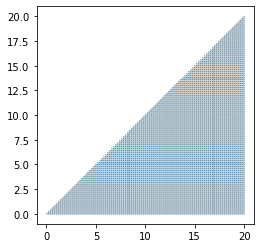

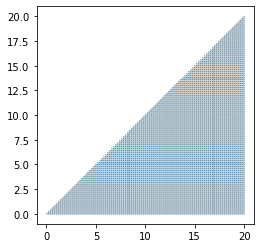

In [96]:
kwant.plot(syst)

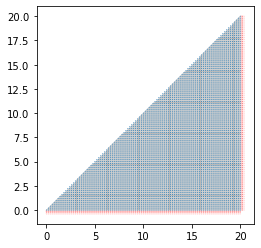

In [97]:
####botom lead
sym_lead_bot=kwant.TranslationalSymmetry((0,-a))
bot_lead=kwant.Builder(sym_lead_bot)
for j in range(N+1):
    bot_lead[lat(j,0)]=4*t
    if j>0:
        bot_lead[lat(j,0),lat(j-1,0)]=-t
    bot_lead[lat(j,1),lat(j,0)]=-t
syst.attach_lead(bot_lead)

####right_lead
sym_lead_right=kwant.TranslationalSymmetry((a,0))
right_lead=kwant.Builder(sym_lead_right)
for j in range(N+1):
    right_lead[lat(0,j)]=4*t
    if j>0:
        right_lead[lat(0,j),lat(0,j-1)]=-t
    right_lead[lat(1,j),lat(0,j)]=-t
syst.attach_lead(right_lead)

kwant.plot(syst)
syst=syst.finalized()

In [98]:
eps=0.1
band=kwant.physics.Bands(right_lead.finalized())
shape=kwant.smatrix(syst,eps*t).data.shape
shape

(20, 20)

In [99]:
print('for eps=',eps,' E=',eps*t)
print('\n quantum nuber|| energy at 0 parallel momentum expectation|| Kwant result')
ea0=band(0)
for i in range(1,shape[0]//2+2):
    print(i,'\t\t',np.pi**2/N**2*i**2*t,'\t\t\t  ', ea0[i-1])

for eps= 0.1  E= 2.5

 quantum nuber|| energy at 0 parallel momentum expectation|| Kwant result
1 		 0.024674011002723394 			   0.02371401433170002
2 		 0.09869604401089357 			   0.09483356314778994
3 		 0.22206609902451055 			   0.21329118524826932
4 		 0.3947841760435743 			   0.3789745164032055
5 		 0.6168502750680849 			   0.5917263959370317
6 		 0.8882643960980422 			   0.8513450158049112
7 		 1.2090265391334463 			   1.1575841120199672
8 		 1.5791367041742972 			   1.5101531982495238
9 		 1.998594891220595 			   1.908717841359057
10 		 2.4674011002723395 			   2.3528999786421734
11 		 2.9855553313295307 			   2.842278276436131


In [100]:
momenta=np.linspace(-3,3,200)
ens=band(0).size
energies=np.zeros((momenta.size,ens))
for ind,mom in enumerate(momenta):
    energies[ind,:]=band(mom)

(0.0, 3.0)

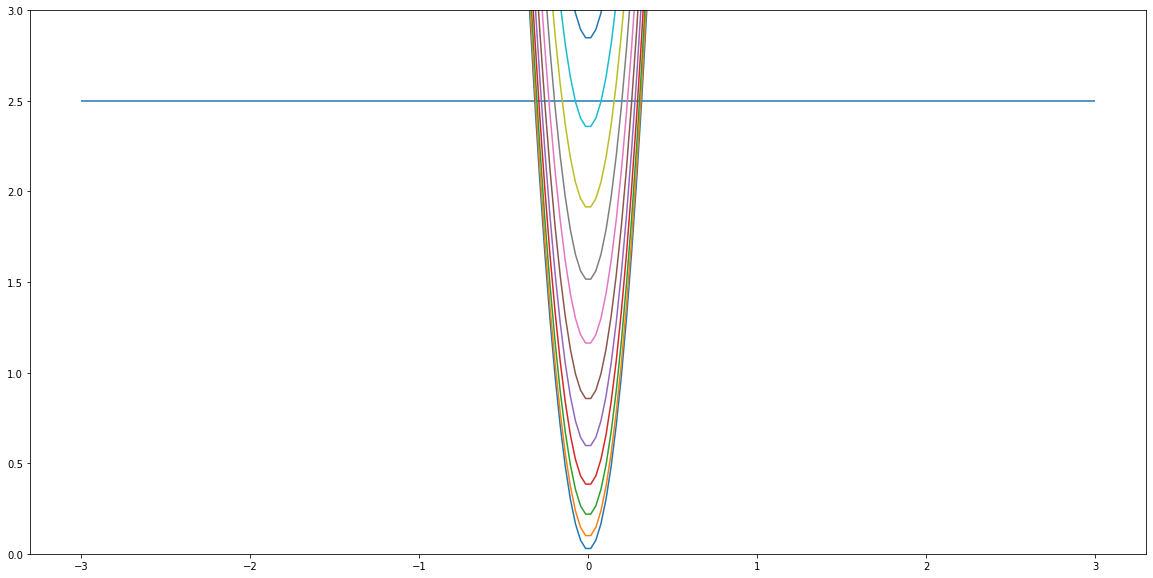

In [101]:
plt.figure(figsize=(20,10))
_=plt.plot(np.array([momenta]*ens).T,energies)
plt.hlines(eps*t,momenta[0],momenta[-1])
plt.ylim(0,t*eps*1.2)

In [102]:
epss=np.linspace(0,0.7,200)[1:]
S_matrices=np.zeros(epss.size,dtype=object)
shapes=[]
for ind,eps in enumerate(epss):
    S_matrices[ind]=kwant.smatrix(syst,eps*t).data
    shapes.append(S_matrices[ind].shape[0])

In [103]:
res=[]
Energies=[]
for shape in np.unique(shapes):
    indis=(shapes==shape)
    if sum(indis)>=2:
        S_s=S_matrices[indis]
        for ind,S in enumerate(S_s[1:]):
            addon=(shapes==shape).argmax()
            Energies.append((epss[addon+ind]+epss[addon+ind+1])*t/2)
            dS=(S-S_s[ind])/epss[0]/t
            res.append(np.trace(((S_s[ind]+S)/2).conjugate().T@dS))

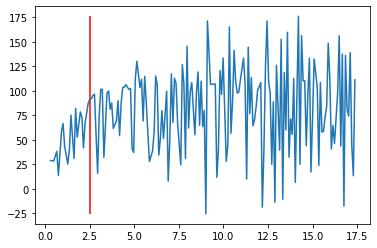

In [104]:
plt.plot(Energies,np.imag(np.array(res)))
plt.vlines(V,np.imag(res).min(),np.imag(res).max(),'r')

In [105]:
for ind,s_test in enumerate(S_matrices):
    if np.equal(s_test,S):
        print(ind)

ValueError: operands could not be broadcast together with shapes (2,2) (54,54) 

In [ ]:
esfdsdf